Chapter 19
# 聊聊Pandas
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = True
p["xtick.minor.visible"] = True
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

In [3]:
print(pd.__version__) # 原始的缓存中的输出是1.4.4

2.2.0


## 创建数据帧

In [4]:
# 定义数据帧

### 从字典

In [5]:
# dict_eg = {'first_column':  ['first_value', 'second_value', ...],
#           'second_column':  ['first_value', 'second_value', ...],
#           'third_column':   ['first_value', 'second_value', ...],
#           ....}
# 采用默认行索引，Zero-based numbering
dict_eg = {'Positive integer': [1, 2, 3, 4, 5], 
           'Greek letter': ['alpha', 'beta', 'gamma', 'delta', 'epsilon']}
df_from_dict = pd.DataFrame(data=dict_eg)
df_from_dict

,Positive integer,Greek letter
0,1,alpha
1,2,beta
2,3,gamma
3,4,delta
4,5,epsilon


In [6]:
df_from_dict2 = df_from_dict.set_index('Positive integer')
df_from_dict2

,Greek letter
Positive integer,
1,alpha
2,beta
3,gamma
4,delta
5,epsilon


In [7]:
df_from_dict2.reset_index()

,Positive integer,Greek letter
0,1,alpha
1,2,beta
2,3,gamma
3,4,delta
4,5,epsilon


In [8]:
# 修改行索引
df_from_dict3 = pd.DataFrame(data=dict_eg, 
                             index = ['a', 'b', 'c', 'd', 'e'])
df_from_dict3

,Positive integer,Greek letter
a,1,alpha
b,2,beta
c,3,gamma
d,4,delta
e,5,epsilon


### 从列表

In [9]:
list_fruits = [['apple',  11], 
               ['banana', 22], 
               ['cherry', 33],
               ['durian', 44]]
df_from_list1 = pd.DataFrame(list_fruits)
df_from_list1

,0,1
0,apple,11
1,banana,22
2,cherry,33
3,durian,44


In [10]:
# 设定行索引
df_from_list1.set_axis(['a', 'b', 'c', 'd'], axis='index')

,0,1
a,apple,11
b,banana,22
c,cherry,33
d,durian,44


In [11]:
# 设定行标签
df_from_list1.set_axis(['Fruit', 'Number'], axis='columns')

,Fruit,Number
0,apple,11
1,banana,22
2,cherry,33
3,durian,44


### 改变row index

In [12]:
df_from_list2 = pd.DataFrame(list_fruits, 
                            columns=['Fruit', 'Number'],
                            index = ['a', 'b', 'c', 'd'])
df_from_list2

,Fruit,Number
a,apple,11
b,banana,22
c,cherry,33
d,durian,44


### 将numpy数组转化为数据帧

In [13]:
numpy_array = np.random.normal(size = (10,4))
# NumPy库中的random.normal函数生成一个形状为(10, 4)的二维数组（矩阵），其中的元素是从正态分布（高斯分布）中随机抽取的数据。
df_from_np = pd.DataFrame(numpy_array,
                   columns=['X1', 'X2', 'X3', 'X4'])
df_from_np

,X1,X2,X3,X4
0,-0.375775,-1.180009,-1.109452,0.145874
1,0.012828,1.606739,-1.276404,1.981128
2,-0.161972,2.051632,0.708672,-0.194458
3,-1.737854,1.057274,-0.132404,-0.358458
4,1.477848,1.302005,0.194204,0.378386
5,-0.418487,-1.282787,-1.142437,-0.847183
6,1.060318,0.885628,0.158816,0.578864
7,0.060831,-0.359416,0.771957,-0.174908
8,-0.091329,-0.872963,0.370565,-0.421689
9,1.206347,2.624595,-0.204054,-1.257791


### for循环生成数据帧

In [14]:
np_data = []
# 创建一个空list
for idx in range(10):
    data_idx = np.random.normal(size = (1,4)).tolist()
    np_data.append(data_idx[0])

# 注意，用list.append() 速度相对较快
df_for_loop = pd.DataFrame(np_data,
                           columns = ['X1','X2','X3','X4'])
df_for_loop

,X1,X2,X3,X4
0,0.180845,-0.896700,0.240190,-0.040477
1,-1.136692,-0.517414,-0.303438,0.276312
2,-1.802934,-0.592586,-0.578244,-1.150254
3,0.434816,-0.822324,-1.314996,-1.137352
4,-0.099786,0.075300,1.761750,-1.095101
5,-0.095370,-0.656038,-0.601404,-1.072372
6,-0.342801,-1.158552,0.650923,-0.193265
7,2.288737,-0.034305,-0.051312,-0.760316
8,2.013637,-0.627688,0.564590,0.473516
9,-0.358670,-0.098526,-0.352623,-0.296662


In [15]:
data_idx[0]

[-0.3586701102173887,
 -0.09852582759323776,
 -0.3526231878899486,
 -0.29666208297569746]

## 鸢尾花数据

In [16]:
iris_df = sns.load_dataset("iris")
# 从Seaborn中导入鸢尾花数据帧
iris_df.to_csv('iris_df.csv')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto
findfont: Generic family 'sans-serif' not foun

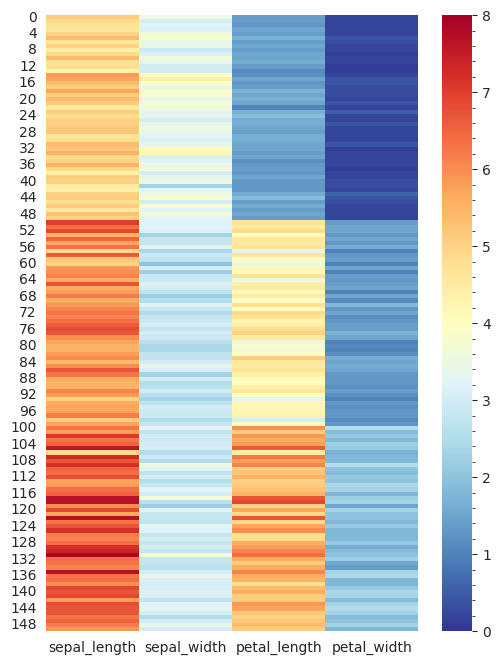

In [18]:
fig,ax = plt.subplots(figsize = (6,8))
sns.heatmap(iris_df.iloc[:, 0:4], 
            cmap = 'RdYlBu_r',
            ax = ax,
            vmax = 8, vmin = 0, # 设定热图的最大值和最小值，超出此范围的值将被裁剪。 # 原来是vmax = 0, vmin = 8
            cbar_kws = {'orientation':'vertical'}, # 设定颜色条的方向
            annot=False)

fig.savefig('鸢尾花数据dataframe.svg', format='svg')

[python]

在 `sns.heatmap` 函数中，`vmax` 和 `vmin` 参数分别用于设置热图的颜色映射范围的最大值和最小值。具体来说：

- **`vmax`**：指定颜色映射的最大值，表示最深或最强的颜色对应的值。
- **`vmin`**：指定颜色映射的最小值，表示最浅或最弱的颜色对应的值。

### 1. **原代码：`vmax = 8, vmin = 0`**
- 颜色映射将0映射为颜色条的最浅颜色（通常是冷色），8映射为颜色条的最深颜色（通常是暖色）。
- 数据中的值接近0的部分将显示为冷色，接近8的部分将显示为暖色。
- 这种设置符合直觉：较小的数值使用冷色，较大的数值使用暖色。

### 2. **修改后的代码：`vmax = 0, vmin = 8`**
- 如果将 `vmax` 设置为0，`vmin` 设置为8，颜色映射的效果将被“反转”。
- 现在，8将对应于颜色条的最浅颜色，0将对应于颜色条的最深颜色。
- 数据中的值接近8的部分将显示为冷色，接近0的部分将显示为暖色。

### 3. **影响和结果**
- **颜色反转**：将 `vmax` 和 `vmin` 互换后，热图的颜色映射将反转。原本使用暖色表示大值的区域将使用冷色，反之亦然。
- **图形直观性**：这可能会导致图表的直观性受到影响。因为在大多数情况下，我们习惯于使用暖色表示大值，冷色表示小值。如果反转了颜色映射，阅读和解释图表可能会变得困难或不符合常规预期。
- **数据的视觉效果**：数据的视觉呈现效果会有所不同。例如，原本高值数据点可能在视觉上显得“弱化”，而低值数据点则显得“增强”。

### 4. **总结**
使用 `vmax=0, vmin=8` 会导致热图的颜色映射与常规习惯相反，从而影响图表的可读性和直观性。如果没有特殊需求或目的，这样的设置可能会造成不必要的困惑。因此，通常建议使用 `vmax` 对应较大值，`vmin` 对应较小值，以保持数据可视化的一致性和易读性。

In [51]:
# 打印整个数据集
print(iris_df.to_string())

     sepal_length  sepal_width  petal_length  petal_width     species
0             5.1          3.5           1.4          0.2      setosa
1             4.9          3.0           1.4          0.2      setosa
2             4.7          3.2           1.3          0.2      setosa
3             4.6          3.1           1.5          0.2      setosa
4             5.0          3.6           1.4          0.2      setosa
5             5.4          3.9           1.7          0.4      setosa
6             4.6          3.4           1.4          0.3      setosa
7             5.0          3.4           1.5          0.2      setosa
8             4.4          2.9           1.4          0.2      setosa
9             4.9          3.1           1.5          0.1      setosa
10            5.4          3.7           1.5          0.2      setosa
11            4.8          3.4           1.6          0.2      setosa
12            4.8          3.0           1.4          0.1      setosa
13            4.3   

In [23]:
iris_df.to_numpy() # 将数据帧转化为NumPy array
# , dtype=object
# 在 NumPy 中，dtype=object 表示数组中的元素类型为 Python 对象。
# 这意味着数组的每个元素都可以是任意类型的 Python 对象，
# 例如整数、浮点数、字符串、列表、字典等。
# 与其他 NumPy 数组不同，dtype=object 数组允许每个元素具有不同的数据类型。

# 当你创建一个 NumPy 数组并指定 dtype=object，
# NumPy 将会把数组视为一个包含 Python 对象的数组，
# 而不是传统的数值类型数组。这种数组的灵活性较高，
# 但也会导致一些性能上的损失，
# 因为在处理数组时无法利用 NumPy 的优化和并行计算功能。

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

## 查询

In [6]:
# pandas.DataFrame.index
iris_df.index

RangeIndex(start=0, stop=150, step=1)

In [10]:
row_index_list = list(iris_df.index)
row_index_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149]

In [11]:
# pandas.DataFrame.columns
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
list(iris_df.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [4]:
# pandas.DataFrame.axes
iris_df.axes

[RangeIndex(start=0, stop=150, step=1),
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'species'],
       dtype='object')]

In [24]:
# 判断数据类型
type(iris_df)

pandas.core.frame.DataFrame

In [15]:
# 数据帧信息汇总
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
# pandas.DataFrame.values
iris_df.values

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

In [ ]:
# pandas.DataFrame.describe
iris_df.describe()

In [68]:
# 小数点后一位
iris_df.describe().round(1)

,sepal_length,sepal_width,petal_length,petal_width
count,150.0,150.0,150.0,150.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.4,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


In [21]:
# pandas.DataFrame.nunique
iris_df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [33]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
# 打印数据帧前5行
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# 打印数据帧后5行
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### 形状

In [34]:
# 数据帧本质上就是一个表格
# 获取数据帧形状
# pandas.DataFrame.shape
iris_df.shape

(150, 5)

In [ ]:
# pandas.DataFrame.ndim

In [35]:
# 获取表格元素总数
# pandas.DataFrame.size
iris_df.size

750

In [5]:
# 每一列非缺失值的数量
# pandas.DataFrame.count
iris_df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [ ]:
print(iris_df.count(axis = 1))

In [7]:
iris_df.count() * 100 / len(iris_df)

sepal_length    100.0
sepal_width     100.0
petal_length    100.0
petal_width     100.0
species         100.0
dtype: float64

In [8]:
# pandas.DataFrame.isnull
iris_df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [6]:
iris_df.isnull().sum() * 100 / len(iris_df)

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

0      5
1      5
2      5
3      5
4      5
      ..
145    5
146    5
147    5
148    5
149    5
Length: 150, dtype: int64


In [30]:
# 获取数据帧行数，几种不同方法
print(iris_df.shape[0])
print(len(iris_df))
print(len(iris_df.index)) 
print(iris_df[iris_df.columns[0]].count())
num_rows = len(iris_df.axes[0])
num_rows

150
150
150
150


150

In [12]:
# 获取数据帧列数，几种不同方法
print(iris_df.shape[1])
print(len(iris_df.T))
print(len(iris_df.columns))
print(len(iris_df.axes[1]))

5
5
5
5


In [31]:
# 获得表头名称
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### 循环

In [19]:
# iterate rows
for idx, row_idx in iris_df.iterrows():
    print('=================')
    print('Row index =',str(idx))
    print(row_idx['sepal_length'], row_idx['sepal_width'])

Row index = 0
5.1 3.5
Row index = 1
4.9 3.0
Row index = 2
4.7 3.2
Row index = 3
4.6 3.1
Row index = 4
5.0 3.6
Row index = 5
5.4 3.9
Row index = 6
4.6 3.4
Row index = 7
5.0 3.4
Row index = 8
4.4 2.9
Row index = 9
4.9 3.1
Row index = 10
5.4 3.7
Row index = 11
4.8 3.4
Row index = 12
4.8 3.0
Row index = 13
4.3 3.0
Row index = 14
5.8 4.0
Row index = 15
5.7 4.4
Row index = 16
5.4 3.9
Row index = 17
5.1 3.5
Row index = 18
5.7 3.8
Row index = 19
5.1 3.8
Row index = 20
5.4 3.4
Row index = 21
5.1 3.7
Row index = 22
4.6 3.6
Row index = 23
5.1 3.3
Row index = 24
4.8 3.4
Row index = 25
5.0 3.0
Row index = 26
5.0 3.4
Row index = 27
5.2 3.5
Row index = 28
5.2 3.4
Row index = 29
4.7 3.2
Row index = 30
4.8 3.1
Row index = 31
5.4 3.4
Row index = 32
5.2 4.1
Row index = 33
5.5 4.2
Row index = 34
4.9 3.1
Row index = 35
5.0 3.2
Row index = 36
5.5 3.5
Row index = 37
4.9 3.6
Row index = 38
4.4 3.0
Row index = 39
5.1 3.4
Row index = 40
5.0 3.5
Row index = 41
4.5 2.3
Row index = 42
4.4 3.2
Row index = 43
5.0 3.

In [20]:
# iterate column

for column_idx in iris_df:
    print(column_idx)
    print(iris_df[column_idx])
    

sepal_length
0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64
sepal_width
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64
petal_length
0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64
petal_width
0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64
species
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [22]:
for column_idx in iris_df.iteritems():
    print(column_idx)


('sepal_length', 0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64)
('sepal_width', 0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64)
('petal_length', 0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64)
('petal_width', 0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64)
('species', 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object)


C:\Users\james\AppData\Local\Temp\ipykernel_10148\2730655476.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_idx in iris_df.iteritems():


In [23]:
for column_idx in iris_df.items():
    print(column_idx)


('sepal_length', 0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64)
('sepal_width', 0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64)
('petal_length', 0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64)
('petal_width', 0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64)
('species', 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object)


### 转化

In [100]:
# 转置
iris_df.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal_length,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal_width,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal_length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal_width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
species,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica


In [ ]:
# 将数据帧转化为numpy array
iris_df_2_array = iris_df.to_numpy()
iris_df_2_array

In [99]:
# 数据帧前四列转化为numpy array
iris_df_2_array_numeric = iris_df[iris_df.columns[:4]].to_numpy()
iris_df_2_array_numeric

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [103]:
iris_df_2_array_numeric.shape

(150, 4)

In [101]:
# 指定column名称，转化成numpy array
iris_df_2_array_sepal = iris_df[['sepal_length','sepal_width']].to_numpy()
iris_df_2_array_sepal

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [102]:
iris_df_2_array_sepal.shape

(150, 2)

### 更改表头

In [31]:
iris_df.rename(columns={'sepal_length': 'X1', 
                        'sepal_width':  'X2',
                        'petal_length': 'X3',
                        'petal_width':  'X4',
                        'species':      'Y'})
# 注意，函数输入增加 inplace=True，直接修改原数据帧表头

,X1,X2,X3,X4,Y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
# 另外两种新方法：
iris_df.rename({'sepal_length': 'X1', 
                'sepal_width':  'X2',
                'petal_length': 'X3',
                'petal_width':  'X4',
                'species':      'Y'},
               axis = 1)

,X1,X2,X3,X4,Y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
iris_df.rename({'sepal_length': 'X1', 
                'sepal_width':  'X2',
                'petal_length': 'X3',
                'petal_width':  'X4',
                'species':      'Y'},
               axis = 'columns')

,X1,X2,X3,X4,Y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [35]:
# 加“根、缀”
iris_df_suffix = iris_df.add_suffix('_col')
iris_df_suffix.head()

,sepal_length_col,sepal_width_col,petal_length_col,petal_width_col,species_col
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 修改行索引

In [45]:
iris_df.rename(lambda x: f'idx_{x}')

,sepal_length,sepal_width,petal_length,petal_width,species
idx_0,5.1,3.5,1.4,0.2,setosa
idx_1,4.9,3.0,1.4,0.2,setosa
idx_2,4.7,3.2,1.3,0.2,setosa
idx_3,4.6,3.1,1.5,0.2,setosa
idx_4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
idx_145,6.7,3.0,5.2,2.3,virginica
idx_146,6.3,2.5,5.0,1.9,virginica
idx_147,6.5,3.0,5.2,2.0,virginica
idx_148,6.2,3.4,5.4,2.3,virginica


In [46]:
iris_df.rename(lambda x: f'{x}_idx')

,sepal_length,sepal_width,petal_length,petal_width,species
0_idx,5.1,3.5,1.4,0.2,setosa
1_idx,4.9,3.0,1.4,0.2,setosa
2_idx,4.7,3.2,1.3,0.2,setosa
3_idx,4.6,3.1,1.5,0.2,setosa
4_idx,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145_idx,6.7,3.0,5.2,2.3,virginica
146_idx,6.3,2.5,5.0,1.9,virginica
147_idx,6.5,3.0,5.2,2.0,virginica
148_idx,6.2,3.4,5.4,2.3,virginica


In [36]:
iris_df_suffix.rename(columns = lambda x: x.strip('_col'))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [40]:
iris_df_prefix = iris_df.add_prefix('col_').head()
iris_df_prefix

,col_sepal_length,col_sepal_width,col_petal_length,col_petal_width,col_species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
iris_df_prefix.rename(columns = lambda x: x.strip('col_'))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 更改列顺序

In [47]:
# 当前列顺序
iris_df.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [48]:
# 顺序调转
new_col_order = iris_df.columns.tolist()[::-1]
new_col_order

['species', 'petal_width', 'petal_length', 'sepal_width', 'sepal_length']

In [49]:
iris_df[new_col_order]

,species,petal_width,petal_length,sepal_width,sepal_length
0,setosa,0.2,1.4,3.5,5.1
1,setosa,0.2,1.4,3.0,4.9
2,setosa,0.2,1.3,3.2,4.7
3,setosa,0.2,1.5,3.1,4.6
4,setosa,0.2,1.4,3.6,5.0
...,...,...,...,...,...
145,virginica,2.3,5.2,3.0,6.7
146,virginica,1.9,5.0,2.5,6.3
147,virginica,2.0,5.2,3.0,6.5
148,virginica,2.3,5.4,3.4,6.2


In [58]:
# 自定义顺序
new_col_order = ['species',
                 'sepal_length', 'petal_length',
                 'sepal_width', 'petal_width']
iris_df[new_col_order] 

False

In [52]:
iris_df.reindex(columns=new_col_order)

,species,sepal_length,petal_length,sepal_width,petal_width
0,setosa,5.1,1.4,3.5,0.2
1,setosa,4.9,1.4,3.0,0.2
2,setosa,4.7,1.3,3.2,0.2
3,setosa,4.6,1.5,3.1,0.2
4,setosa,5.0,1.4,3.6,0.2
...,...,...,...,...,...
145,virginica,6.7,5.2,3.0,2.3
146,virginica,6.3,5.0,2.5,1.9
147,virginica,6.5,5.2,3.0,2.0
148,virginica,6.2,5.4,3.4,2.3


In [53]:
iris_df.loc[:, new_col_order]

,species,sepal_length,petal_length,sepal_width,petal_width
0,setosa,5.1,1.4,3.5,0.2
1,setosa,4.9,1.4,3.0,0.2
2,setosa,4.7,1.3,3.2,0.2
3,setosa,4.6,1.5,3.1,0.2
4,setosa,5.0,1.4,3.6,0.2
...,...,...,...,...,...
145,virginica,6.7,5.2,3.0,2.3
146,virginica,6.3,5.0,2.5,1.9
147,virginica,6.5,5.2,3.0,2.0
148,virginica,6.2,5.4,3.4,2.3


In [54]:
iris_df.iloc[:, [4,0,2,1,3]]

,species,sepal_length,petal_length,sepal_width,petal_width
0,setosa,5.1,1.4,3.5,0.2
1,setosa,4.9,1.4,3.0,0.2
2,setosa,4.7,1.3,3.2,0.2
3,setosa,4.6,1.5,3.1,0.2
4,setosa,5.0,1.4,3.6,0.2
...,...,...,...,...,...
145,virginica,6.7,5.2,3.0,2.3
146,virginica,6.3,5.0,2.5,1.9
147,virginica,6.5,5.2,3.0,2.0
148,virginica,6.2,5.4,3.4,2.3


In [55]:
iris_df.set_axis(new_col_order, axis=1) 

,species,sepal_length,petal_length,sepal_width,petal_width
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 修改行顺序

In [96]:
# 取出前5行，并修改行索引
iris_df_ = iris_df.iloc[:5,:].rename(lambda x: 
                                     f'idx_{x}')

In [88]:
new_order = ['idx_4','idx_2','idx_0','idx_3','idx_1']
iris_df_.reindex(new_order)

,sepal_length,sepal_width,petal_length,petal_width,species
idx_4,5.0,3.6,1.4,0.2,setosa
idx_2,4.7,3.2,1.3,0.2,setosa
idx_0,5.1,3.5,1.4,0.2,setosa
idx_3,4.6,3.1,1.5,0.2,setosa
idx_1,4.9,3.0,1.4,0.2,setosa


In [95]:
iris_df_.loc[new_order]

,sepal_length,sepal_width,petal_length,petal_width,species
idx_4,5.0,3.6,1.4,0.2,setosa
idx_2,4.7,3.2,1.3,0.2,setosa
idx_0,5.1,3.5,1.4,0.2,setosa
idx_3,4.6,3.1,1.5,0.2,setosa
idx_1,4.9,3.0,1.4,0.2,setosa


In [91]:
new_order_int = [4, 2, 0, 3, 1]
iris_df_.iloc[new_order_int]

,sepal_length,sepal_width,petal_length,petal_width,species
idx_4,5.0,3.6,1.4,0.2,setosa
idx_2,4.7,3.2,1.3,0.2,setosa
idx_0,5.1,3.5,1.4,0.2,setosa
idx_3,4.6,3.1,1.5,0.2,setosa
idx_1,4.9,3.0,1.4,0.2,setosa


In [94]:
iris_df_.sort_index(ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
idx_4,5.0,3.6,1.4,0.2,setosa
idx_3,4.6,3.1,1.5,0.2,setosa
idx_2,4.7,3.2,1.3,0.2,setosa
idx_1,4.9,3.0,1.4,0.2,setosa
idx_0,5.1,3.5,1.4,0.2,setosa


### 删除特定行

In [116]:
iris_df.drop(index=[0,1])
# 将inplace参数设置为True，可以在原地修改DataFrame，而不返回一个新的DataFrame

,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 删除特定列

In [117]:
iris_df.drop(columns='species')

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 视图 vs 副本

In [119]:
df = pd.DataFrame({'A': [1, 2], 'B': [11, 22]})
df

,A,B
0,1,11
1,2,22


In [128]:
df_view = df[['A']]
df_view

,A
0,1
1,2


## 时间序列

In [ ]:
import pandas_datareader as pdr
import datetime

start_date = datetime.datetime(2014, 1, 1)
end_date   = datetime.datetime(2022, 12, 31)

ticker_list = ['SP500']
df = pdr.DataReader(ticker_list, 
                    'fred', 
                    start_date, 
                    end_date)
df.to_csv('SP500_' + str(start_date.date()) + '_' + str(end_date.date()) + '.csv')
df.to_pickle('SP500_' + str(start_date.date()) + '_' + str(end_date.date()) + '.pkl')
# pandas.read_csv
# pandas.read_pickle

## 导入、导出文件

### 导出数据

In [9]:
# 将数据帧存成CSV文件
csv_filename = 'iris_df.csv'
iris_df.to_csv(csv_filename, 
               index = False)
# 目前JupyterLab默认支持直接查看CSV数据，不需要任何插件
# 参考:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [10]:
# 将数据帧存成Excel文件
xlsx_filename = 'iris_df.xlsx'
iris_df.to_excel(xlsx_filename,
                 sheet_name='iris_data')  
#参考：
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html
# 数据帧还可以存成SQL、JSON、pickle等等格式

### 导入文件

In [ ]:
# 将导出的CSV、Excel文件再次读入

In [13]:
# 读入CSV文件
iris_df_from_CSV = pd.read_csv(csv_filename)
# 参考：
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

iris_df_from_CSV.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
# 读入Excel文件
iris_df_from_Excel = pd.read_excel(xlsx_filename)
# 参考：
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

iris_df_from_Excel.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023